In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
ticker = 'CL=F'

data = yf.download(ticker, start='2022-01-01', end='2025-04-07', progress=False)
close_prices = data['Close']

returns = close_prices.pct_change().dropna()
sigma = (returns.std() * np.sqrt(252)).values

YF.download() has changed argument auto_adjust default to True


In [3]:
S0 = close_prices.iloc[-1].values
K = 65
T = 1
num_steps = 252
r = 0.0425
n_sims = 10_000

## Ejercicio 1: Funciones

In [4]:
def simulate_prices(S0, r, sigma, T, num_steps, n_sims):
    dt = T / num_steps
    Z = np.random.normal(size=(n_sims, num_steps))
    simulated_returns = (r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z

    simulated_cumulative_returns = np.cumsum(simulated_returns, axis=1)
    simulated_prices = S0 * np.exp(simulated_cumulative_returns)
    return simulated_prices

def get_price__fixed_strike__average_price(simulated_prices, K, r, T, option_type: str):
    avg_prices = np.mean(simulated_prices[:, 1:], axis=1)
    if option_type == 'call':
        payoff = np.maximum(avg_prices - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - avg_prices, 0)

    option_price =  np.exp(-r * T) * np.mean(payoff)

    return option_price

def get_price__floating_strike__average_price(simulated_prices, ST, r, T, option_type: str):
    avg_prices = np.mean(simulated_prices[:, 1:], axis=1)
    if option_type == 'call':
        payoff = np.maximum(ST - avg_prices, 0)
    elif option_type == 'put':
        payoff = np.maximum(avg_prices - ST, 0)

    option_price = np.exp(-r * T) * np.mean(payoff)

    return option_price


def get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, option_type: str):
    geometric_prices = np.exp(np.mean(np.log(simulated_prices[:, 1:]), axis=1))
    if option_type == 'call':
        payoff = np.maximum(geometric_prices - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - geometric_prices, 0)

    option_price = np.exp(-r * T) * np.mean(payoff)

    return option_price

def get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, option_type: str):
    geometric_prices = np.exp(np.mean(np.log(simulated_prices[:, 1:]), axis=1))
    if option_type == 'call':
        payoff = np.maximum(ST - geometric_prices, 0)
    elif option_type == 'put':
        payoff = np.maximum(geometric_prices - ST, 0)

    option_price = np.exp(-r * T) * np.mean(payoff)

    return option_price

def get_price__european(simulated_prices, K, r, T, option_type: str):
    ST = simulated_prices[:, -1]
    if option_type == 'call':
        payoff = np.maximum(ST - K, 0)
    elif option_type == 'put':
        payoff = np.maximum(K - ST, 0)

    option_price = np.exp(-r * T) * np.mean(payoff)

    return option_price

In [5]:
simulated_prices = simulate_prices(S0, r, sigma, T, num_steps, n_sims)
ST = simulated_prices[:, -1]

In [6]:
get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'call')

4.483365445049524

In [7]:
get_price__floating_strike__average_price(simulated_prices, ST, r, T, 'call')

5.753649062403778

In [8]:
get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'call')

4.117359660892781

In [9]:
get_price__floating_strike__geometric_price(simulated_prices, ST, r, T, 'call')

6.124054417088514

In [10]:
get_price__european(simulated_prices, K, r, T, 'call')

8.762683094171026

## Ejercicio 2: Gráficas

In [11]:
get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'call')
get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'call')
get_price__european(simulated_prices, K, r, T, 'call')

8.762683094171026

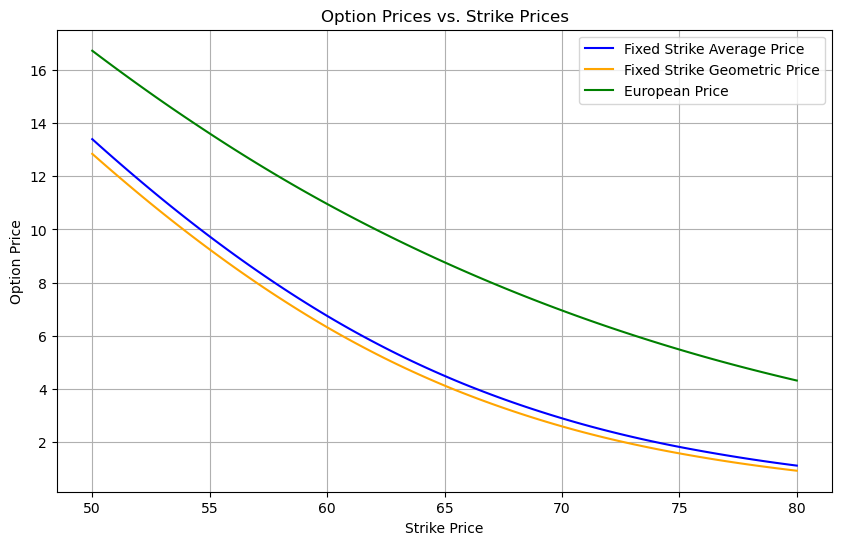

In [14]:
strikes = np.linspace(50, 80, 100)

fs_avg_price = [get_price__fixed_strike__average_price(simulated_prices, K, r, T, 'call') for K in strikes]
fs_geom_price = [get_price__fixed_strike__geometric_price(simulated_prices, K, r, T, 'call') for K in strikes]
eu_price = [get_price__european(simulated_prices, K, r, T, 'call') for K in strikes]

plt.figure(figsize=(10, 6))
plt.plot(strikes, fs_avg_price, label='Fixed Strike Average Price', color='blue')
plt.plot(strikes, fs_geom_price, label='Fixed Strike Geometric Price', color='orange')
plt.plot(strikes, eu_price, label='European Price', color='green')
plt.title('Option Prices vs. Strike Prices')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

Las más barata es la opción asiática con promedio geométrico, de ahí la que usa promedio aritmético y por último la más cara es la opción europea convencional.